# Import Libraries

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## 1 . Cargar el archivo datos_arts.csv en Python

In [3]:
DATA_RAW_PATH = '../data/raw/'

In [4]:
datos_arts = pd.read_csv(DATA_RAW_PATH + 'datos_arts.csv', delimiter=',')

Veamos la cantidad de filas y columnas del dataset

In [5]:
datos_arts.shape

(63595, 9)

Vemos que el dataset consta de 63595 filas y 8 columnas

Veamos una vista previa del dataset

In [6]:
datos_arts.head()

,grupo,depto,item,articulo,fecha,precio,unidades,importe,SECTOR
0,15 LIMPIEZA DEL HOGAR,CUIDADO DE LA ROPA,1000025719,1000025719 JABON EN BARRA BULL DOG GLICERINA 2...,2020-08-19,54,7.0,378.0,NO COMESTIBLES
1,15 LIMPIEZA DEL HOGAR,CUIDADO DE LA ROPA,1000025724,1000025724 JABON LIQUIDO PAR D.P. 800 CC NEVEX...,2020-08-19,136,1.0,136.0,NO COMESTIBLES
2,15 LIMPIEZA DEL HOGAR,CUIDADO DE LA ROPA,1000025752,1000025752 JABON LIQ NEVEX MATIC MULTIAC DIF D...,2020-08-19,410,1.0,410.0,NO COMESTIBLES
3,15 LIMPIEZA DEL HOGAR,CUIDADO DE SUPERFICIES,1000025907,1000025907 PANO DE PISO STANDARD 50X55 CM,2020-08-19,79,1.0,79.0,NO COMESTIBLES
4,15 LIMPIEZA DEL HOGAR,CUIDADO DE SUPERFICIES,1000025908,1000025908 REJILLA 37X37CM.,2020-08-19,59,1.0,59.0,NO COMESTIBLES


**Es importante identificar más allá del significado de cada columna, que en éste dataset son autoexplicativas, ¿qué representa cada fila?**

Por ejemplo: ¿Hay más de una fila por fecha?

In [7]:
datos_arts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63595 entries, 0 to 63594
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   grupo     63595 non-null  object 
 1   depto     63595 non-null  object 
 2   item      63595 non-null  int64  
 3   articulo  63595 non-null  object 
 4   fecha     63595 non-null  object 
 5   precio    63595 non-null  int64  
 6   unidades  63595 non-null  float64
 7   importe   63595 non-null  float64
 8   SECTOR    63595 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 4.4+ MB


**Pasemos la fecha a formato datetime**

In [8]:
datos_arts['fecha'] = pd.to_datetime(datos_arts['fecha'])

In [9]:
datos_arts.tail(50)

,grupo,depto,item,articulo,fecha,precio,unidades,importe,SECTOR
63545,18 PERFUMERIA,CUIDADO CAPILAR,1000153838,1000153838 SHAMPOO SANTE BRILLO 900 CC,2020-11-10,179,2.0,358.0,NO COMESTIBLES
63546,3 COMESTIBLES,MASCOTAS,1000154991,1000154991 ALIMENTO PARA GATOS TATA 1KG,2020-11-10,149,1.0,149.0,3 COMESTIBLES
63547,18 PERFUMERIA,CUIDADO CAPILAR,1000155150,1000155150 PACK ELVIVE OLEO SHAMPOO 680 + ACON...,2020-11-10,399,2.0,798.0,NO COMESTIBLES
63548,18 PERFUMERIA,CUIDADO CORPORAL,1000155851,1000155851 DESODORANTE AEROSOL REXONA CLINICAL...,2020-11-10,45,1.0,45.0,NO COMESTIBLES
63549,3 COMESTIBLES,FARINACEOS,1000156010,1000156010 HARINA INTEGRAL CANUELAS 1 KG,2020-11-10,97,4.0,388.0,3 COMESTIBLES
63550,1 BEBIDAS,BEB. ALCOHOLICAS,1000156204,1000156204 CERVEZA BANDIDOS LN 330 ML,2020-11-10,55,6.0,330.0,1 BEBIDAS
63551,3 COMESTIBLES,GOLOSINAS,1000156304,1000156304 ALFAJOR BOCADO DULCE DE LECHE TATA X 6,2020-11-10,62,1.0,62.0,3 COMESTIBLES
63552,3 COMESTIBLES,GOLOSINAS,1000156345,1000156345 ALFAJOR NIEVE TATA x 6,2020-11-10,83,4.0,332.0,3 COMESTIBLES
63553,3 COMESTIBLES,GOLOSINAS,1000156402,1000156402 BOCADO BLACK BLANCO,2020-11-10,16,1.0,16.0,3 COMESTIBLES
63554,3 COMESTIBLES,GOLOSINAS,1000156403,1000156403 BOCADO BLACK DULCE DE LECHE,2020-11-10,16,2.0,32.0,3 COMESTIBLES


**¿Hay fechas duplicadas?**

In [10]:
datos_arts[datos_arts['fecha'].duplicated(keep=False)].sort_values(['fecha'], ascending=True).shape

(63595, 9)

Vemos que todo el dataset tiene fechas que se repiten en diferentes filas, lo cual es visible también en la vista previa del dataset, donde varias de las primeras filas corresponden a la misma fecha ("2020-08-19")

**Observación:**

Cada fila representa un tipo de artículo vendido en una determinada fecha, con toda su información:
- número de item (que parece ser un código de artículo), 
- grupo y departamento al que pertenece el artículo vendido, 
- precio (no sabemos la unidad monetaria exacta, si son pesos argentinos, dólares...), 
- cantidad de unidades vendidas en esa fecha de ese artículo, y 
- el importe total de la venta de esos artículos en esa fecha (precio * unidades)

## 2. Obtener un dataframe que tenga las siguientes variables (columnas):

- Fecha (un registro por día)
- Cantidad_articulos : cantidad de artículos distintos para cada fecha
- Total_importe: suma de los importes para cada fecha

Como puede haber más de una fila para la misma fecha, vamos a agrupar por fecha y sumarizar la cantidad de artículos distintos para cada fecha y el total de importe de la venta para cada fecha.

In [11]:
datos_arts_sales_group = datos_arts.groupby('fecha', as_index=False).agg({"articulo": "nunique", "importe": "sum" }).sort_values(["fecha"], ascending=True)
datos_arts_sales_group.rename(columns = {'articulo':'cantidad_articulos', 'importe': 'total_importe'}, inplace = True)
datos_arts_sales_group

,fecha,cantidad_articulos,total_importe
0,2020-08-19,749,265570.24
1,2020-08-20,660,226525.74
2,2020-08-21,772,297955.58
3,2020-08-22,841,334601.93
4,2020-08-23,733,249298.28
5,2020-08-24,826,339008.46
6,2020-08-25,664,193091.21
7,2020-08-26,698,206034.22
8,2020-08-27,595,157663.48
9,2020-08-28,788,284494.96


Chequeamos para una fecha en particular con otro cálculo similar

In [12]:
datos_arts[datos_arts["fecha"]=='2020-08-19']['articulo'].nunique()

749

**Distribución de cantidad de artículos diferentes vendidos por día**

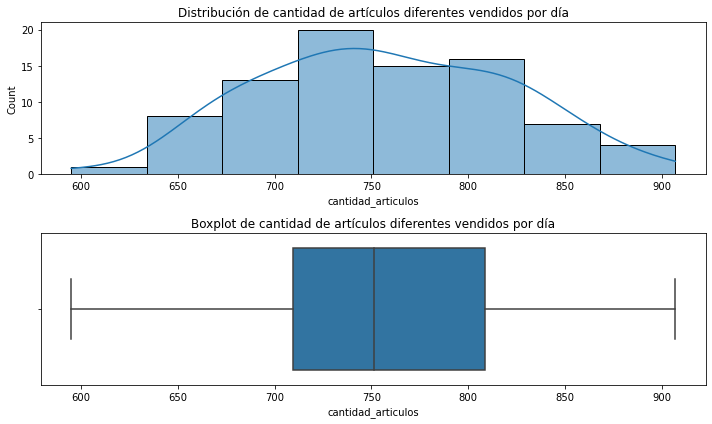

In [13]:
fig, axs = plt.subplots(2, figsize = (10,6))
plt1 = sns.histplot(x=datos_arts_sales_group['cantidad_articulos'], kde=True, ax = axs[0]).set(title='Distribución de cantidad de artículos diferentes vendidos por día')
plt2 = sns.boxplot(x=datos_arts_sales_group["cantidad_articulos"], ax = axs[1]).set(title='Boxplot de cantidad de artículos diferentes vendidos por día')
plt.tight_layout()

**Distribución del total de importe vendido por día**

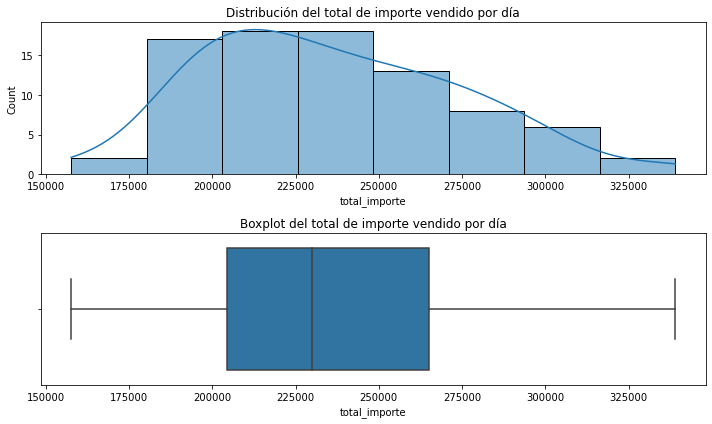

In [14]:
fig, axs = plt.subplots(2, figsize = (10,6))
plt1 = sns.histplot(x=datos_arts_sales_group['total_importe'], kde=True, ax = axs[0]).set(title='Distribución del total de importe vendido por día')
plt2 = sns.boxplot(x=datos_arts_sales_group["total_importe"], ax = axs[1]).set(title='Boxplot del total de importe vendido por día')
plt.tight_layout()

**Observaciones:**

- Podemos ver que el dataset se compone de ventas dentro del período: 2020-08-19 y 2020-11-10 (82 días)
-  En cuanto a la "Cantidad de artículos diferentes vendidos por día" vemos que presenta una distribución similar a una normal. Con un mínimo de 600 y un máximo de 900. El 50% de las ventas por fecha se concentra en ventas de aproximadamente 750 artículos diferentes. No se visualizan valores extremos u outliers.
-  En cuanto al "total de importe vendido por día" vemos que presenta una distribución sesgada hacia la izquierda. Con un mínimo de 150000 un máximo de 325000. El 50% del total de importe vendido por día se concentra en ventas de aproximadamente 225000 (en alguna unidad monetaria). No se visualizan valores extremos u outliers.


## 3. En el archivo original, crear una nueva variable (SECTOR) que tenga los siguientes valores:
- Si la variable grupo es igual a 15 LIMPIEZA DEL HOGAR o 18 PERFUMERIA, entonces SECTOR = “NO COMESTIBLES”
- Si la variable grupo es igual a 4 LACTEOS o 9 FIAMBRERIA, entonces SECTOR = “PERECEDEROS”
- El resto de los casos SECTOR = grupo

In [15]:
condition_1 = (datos_arts['grupo'] == '15 LIMPIEZA DEL HOGAR') | (datos_arts['grupo'] == '18 PERFUMERIA')
condition_2 = (datos_arts['grupo'] == '4 LACTEOS') | (datos_arts['grupo'] == '9 FIAMBRERIA')
datos_arts['SECTOR'] = np.where(condition_1,  "NO COMESTIBLES", np.where(condition_2, "PERECEDEROS", datos_arts['grupo']))

Hacemos un mínimo chequeo de que obtuvimos lo correcto:

In [16]:
# Teníamos las siguientes cantidades en cada categoría de grupo
datos_arts.grupo.value_counts()

3 COMESTIBLES            33325
1 BEBIDAS                10081
18 PERFUMERIA             9708
15 LIMPIEZA DEL HOGAR     4788
4 LACTEOS                 4319
9 FIAMBRERIA              1374
Name: grupo, dtype: int64

In [17]:
# Reagrupadas por la nueva categoría SECTOR, tenemos las siguientes cantidades
datos_arts.SECTOR.value_counts()

3 COMESTIBLES     33325
NO COMESTIBLES    14496
1 BEBIDAS         10081
PERECEDEROS        5693
Name: SECTOR, dtype: int64

In [18]:
# Sumando las cantidades en cada grupo "15 LIMPIEZA DEL HOGAR" o "18 PERFUMERIA", 
# vemos que coincide con el sector “NO COMESTIBLES"
9708+4788

14496

In [19]:
# Sumando las cantidades en cada grupo "4 LACTEOS" o "9 FIAMBRERIA", 
# vemos que coincide con el sector “PERECEDEROS"
4319+1374

5693

El resto:
- "3 COMESTIBLES" mantiene su cantidad 3325
- "1 BEBIDAS" mantiene su cantidad 10081

**Guardamos el nuevo dataframe sobreescribiendo el archivo original**

In [20]:
datos_arts.to_csv(DATA_RAW_PATH + 'datos_arts.csv', sep = ',',  index=False)

## 4. Obtener un dataframe que tenga el siguiente formato:
- Debe haber dos columnas para cada uno de los sectores creados en el ejercicio 3, dichas columna serán:
    - promedio de precio
    - suma de importe
Los nombres de las columnas son discrecionales y a decisión de Uds.

- Las filas deben ser los meses obtenidos de la columna fecha

In [21]:
# Formateamos en una nueva columna el formato de fecha requerido
datos_arts['Month_Year'] = datos_arts['fecha'].dt.to_period('M')
# Ordenamos por fecha de forma ascendente
datos_arts = datos_arts.sort_values(['fecha'], ascending=True)
datos_arts.head()

,grupo,depto,item,articulo,fecha,precio,unidades,importe,SECTOR,Month_Year
0,15 LIMPIEZA DEL HOGAR,CUIDADO DE LA ROPA,1000025719,1000025719 JABON EN BARRA BULL DOG GLICERINA 2...,2020-08-19,54,7.0,378.0,NO COMESTIBLES,2020-08
494,3 COMESTIBLES,GALLETAS,1000054947,1000054947 GALLETITAS CHIQUILIN EL TRIGAL 220....,2020-08-19,90,2.0,180.0,3 COMESTIBLES,2020-08
495,3 COMESTIBLES,GALLETAS,1000054951,1000054951 GALLETAS CEREALITAS CLASICAS 200.00 G,2020-08-19,62,1.0,62.0,3 COMESTIBLES,2020-08
496,3 COMESTIBLES,GALLETAS,1000054957,1000054957 GALLETA GRAMADA LA TRIGUEN LIGHT 35...,2020-08-19,108,1.0,108.0,3 COMESTIBLES,2020-08
497,3 COMESTIBLES,GALLETAS,1000054964,1000054964 GALLETA MALTEADA LA TRIG FAMILIA PA...,2020-08-19,116,3.0,348.0,3 COMESTIBLES,2020-08


In [22]:
pivot_table = datos_arts.pivot_table(
index = 'Month_Year',
columns = "SECTOR",
values = ["precio", "importe"],
aggfunc={'precio' : 'mean', 'importe' : 'sum'},
)
pivot_table.columns = pivot_table.columns.map('_'.join)
pivot_table

,importe_1 BEBIDAS,importe_3 COMESTIBLES,importe_NO COMESTIBLES,importe_PERECEDEROS,precio_1 BEBIDAS,precio_3 COMESTIBLES,precio_NO COMESTIBLES,precio_PERECEDEROS
Month_Year,,,,,,,,
2020-08,422772.0,1727381.0,858257.0,243598.69,83.386125,91.468567,157.137782,133.497332
2020-09,941169.0,3880378.0,1582818.0,555445.80,82.462464,94.749433,162.002069,133.279035
2020-10,1098715.0,3910410.0,1678903.0,589202.55,82.257487,94.469502,168.017672,130.341440
2020-11,342759.0,1224818.0,558243.0,194587.12,82.567224,98.359850,176.228571,128.697605


In [23]:
# Renombramos las columnas
columns_name_dict = {
    'importe_1 BEBIDAS': '1_BEBIDAS_sum_importe', 
    'importe_3 COMESTIBLES': '3_COMESTIBLES_sum_importe', 
    'importe_NO COMESTIBLES': 'NO_COMESTIBLES_sum_importe',
    'importe_PERECEDEROS': 'PERECEDEROS_sum_importe', 
    'precio_1 BEBIDAS': '1_BEBIDAS_prom_precio', 
    'precio_3 COMESTIBLES': '3_COMESTIBLES_prom_precio',
    'precio_NO COMESTIBLES': 'NO_COMESTIBLES_prom_precio', 
    'precio_PERECEDEROS': 'PERECEDEROS_prom_precio'
}
pivot_table.rename(columns=columns_name_dict, inplace=True)
# Reacomodamos las columnas
pivot_table = pivot_table[['1_BEBIDAS_prom_precio', '1_BEBIDAS_sum_importe',
                          '3_COMESTIBLES_prom_precio', '3_COMESTIBLES_sum_importe',
                          'NO_COMESTIBLES_prom_precio', 'NO_COMESTIBLES_sum_importe',
                          'PERECEDEROS_prom_precio', 'PERECEDEROS_sum_importe']].reset_index()
# Formateamos la fecha
pivot_table['Month_Year'] = pivot_table['Month_Year'].apply(lambda x: x.strftime('%b-%y'))
pivot_table

,Month_Year,1_BEBIDAS_prom_precio,1_BEBIDAS_sum_importe,3_COMESTIBLES_prom_precio,3_COMESTIBLES_sum_importe,NO_COMESTIBLES_prom_precio,NO_COMESTIBLES_sum_importe,PERECEDEROS_prom_precio,PERECEDEROS_sum_importe
0,Aug-20,83.386125,422772.0,91.468567,1727381.0,157.137782,858257.0,133.497332,243598.69
1,Sep-20,82.462464,941169.0,94.749433,3880378.0,162.002069,1582818.0,133.279035,555445.80
2,Oct-20,82.257487,1098715.0,94.469502,3910410.0,168.017672,1678903.0,130.341440,589202.55
3,Nov-20,82.567224,342759.0,98.359850,1224818.0,176.228571,558243.0,128.697605,194587.12


## 5. Resolver el siguiente enunciado:

Existen dos tablas en una Base de datos:

          a. la tabla Ventas tiene los campos día, artículo, local, unidades_vendidas.
          
          b. la tabla Stock tiene los campos día, articulo, local, unidades_stock.
          
No todas las combinaciones día/articulo/local están en las dos tablas.
Armar una consulta sql genérico que traiga todas las combinaciones día/articulo/local de    las dos tablas con las unidades_vendidas y el unidades_stock completando con 0 cuando no existe el dato de ventas o stock.

Respuesta:

Para darme una idea de la situación, realizo en python algo similar y luego presento la query propuesta en lenguaje SQL

In [24]:
ventas_data = {
    'dia': [1, 3, 4, 7],
    'articulo': ['A', 'C', 'B', 'A'],
    'local': ['L01', 'L034', 'L011', 'L034'],
    'unidades_vendidas': [345, 327, 425, 235]
}
ventas = pd.DataFrame(ventas_data)
ventas

,dia,articulo,local,unidades_vendidas
0,1,A,L01,345
1,3,C,L034,327
2,4,B,L011,425
3,7,A,L034,235


In [25]:
stock_data = {
    'dia': [2, 3, 7, 9, 10],
    'articulo': ['C', 'C', 'A', 'A', 'B'],
    'local': ['L01', 'L034', 'L034', 'L011', 'L02'],
    'unidades_stock': [235, 312, 567, 374, 123]
}
stock = pd.DataFrame(stock_data)
stock

,dia,articulo,local,unidades_stock
0,2,C,L01,235
1,3,C,L034,312
2,7,A,L034,567
3,9,A,L011,374
4,10,B,L02,123


In [26]:
ventas_stock_merged = ventas.merge(stock, 
                                   left_on=['dia', 'articulo', 'local'], 
                                   right_on=['dia', 'articulo', 'local'], 
                                   how='outer')
ventas_stock_merged

,dia,articulo,local,unidades_vendidas,unidades_stock
0,1,A,L01,345.0,NaN
1,3,C,L034,327.0,312.0
2,4,B,L011,425.0,NaN
3,7,A,L034,235.0,567.0
4,2,C,L01,NaN,235.0
5,9,A,L011,NaN,374.0
6,10,B,L02,NaN,123.0


In [27]:
# Remmplazamos los nulos por 0
ventas_stock_merged.fillna({'unidades_vendidas':0, 'unidades_stock':0}, inplace=True)
ventas_stock_merged

,dia,articulo,local,unidades_vendidas,unidades_stock
0,1,A,L01,345.0,0.0
1,3,C,L034,327.0,312.0
2,4,B,L011,425.0,0.0
3,7,A,L034,235.0,567.0
4,2,C,L01,0.0,235.0
5,9,A,L011,0.0,374.0
6,10,B,L02,0.0,123.0


**Sintaxis propuesta en SQL**

``` mysql
SELECT 
    v.dia, 
    v.articulo, 
    v.local, 
    coalesce(unidades_vendidas, 0) as unidades_vendidas, 
    coalesce(unidades_stock, 0) as unidades_stock
FROM ventas AS v 
FULL OUTER JOIN stock AS s
    ON v.dia = s.dia
    AND v.articulo = s.articulo
    AND v.local = s.local
```

## 6. Existe una tabla denominada  pronósticos_de_ventas con los siguientes campos: día, artículo, local, unidades_pronosticadas, fecha_pronóstico.

Para una combinación: día/articulo/local puede haber más de un pronóstico que se identifica con distintas fecha_pronóstico.
 
Armar una consulta en sql genérico que para cada combinación día/articulo/local traiga el pronóstico con fecha_pronóstico más cercana y anterior al día.

Respuesta:

Supondremos que "fecha_pronostico más cercana" se refiere a la fecha de pronóstico más cercana a la fecha actual, y que sea anterior al día actual.

**Sintaxis propuesta en SQL**

``` mysql
SELECT 
    pv.dia, 
    pv.articulo, 
    pv.local, 
    pv.unidades_pronosticadas, 
    MAX(pv.fecha_pronostico)
FROM pronosticos_de_ventas AS pv
GROUP BY 
    pv.dia, 
    pv.articulo, 
    pv.local
HAVING max(pv.fecha_pronostico) < CURRENT_DATE()
```